In [1]:
#------------------------------------------------------------------------------
# Based on Repley's clothes descriptor
#------------------------------------------------------------------------------
import os, uuid, sys
#import subprocess
#import tqdm
import random
import astropy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.misc import imsave
#import time
#import multiprocessing

#from io import BytesIO
from astropy.io import fits
#from functools import partial
from azure.storage.blob import BlockBlobService, PublicAccess

In [5]:
#!pip install azure-storage-blob
# Create the BlockBlockService that is used to call the Blob service 
# for the storage account
import config_blob_keys as cfg

account_name = cfg.AccountName
account_key = cfg.AccountKey
block_blob_service = BlockBlobService(account_name=account_name, 
                                      account_key=account_key)

container_name_proc = cfg.ContNameProc
block_blob_service.set_container_acl(container_name_proc, 
                                     public_access=PublicAccess.Container)

In [39]:
# Create a list "filelist" with the blob content
# inside the "Azure:container/folder" location 
def BlobList(container, folder, filelist, verbose=False):
    
    gen = block_blob_service.list_blobs(container, prefix=folder)
    
    for blob in gen:
        file = str(blob.name).replace(folder,'')
        filelist.append(file)
        if verbose == True:
            print("\t Blob name: " + blob.name)
        
    return filelist


# Download a file "blobfile" from "container" and save it 
# in the file "locfile"
def DownBlob(container, blobfile, locfile, verbose=False):
    
    if verbose == True:
        print('Downloading ' + blobfile + ' to ' + locfile)
    
    block_blob_service.get_blob_to_path(container, 
                                        blobfile, 
                                        locfile)

# Get the .fits image from blob storage and return the associated data
# It uses the DownBlob function
def VisualImage(impath, arm, imnamea, imanameb, verbose=False):
    hdu_list = fits.open(impath)
    #print(hdu_list.info())
    hdu = hdu_list[arm]
    im_data=hdu.data
    
    im_median=np.median(im_data)
    im_std=np.std(im_data)
    
    print("Mean: ", np.mean(im_data))
    print("Median: ", im_median)
    print("StdDev: ", im_std)
    
    fig, ax = plt.subplots(figsize=(4,8))
    plt.imshow(im_data, origin='lower', interpolation='nearest', vmin=im_median-im_std, vmax=im_median+2*im_std)
    plt.tight_layout()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    fig.savefig(imnamea)
    
    fig, ax = plt.subplots(figsize=(8,4))
    plt.hist(np.ndarray.flatten(im_data), bins=50, range=[im_median/2, im_median*10])
    ax.set_yscale('log')
    plt.xlabel('counts')
    plt.ylabel('# counts')
    plt.show()
    fig.savefig(imnameb)
    
def DisplayImage(impath, imnamea, imanameb, verbose=False):

    im_data=np.load(impath)
    
    im_median=np.median(im_data)
    im_std=np.std(im_data)
    
    print("Mean: ", np.mean(im_data))
    print("Median: ", im_median)
    print("StdDev: ", im_std)
    
    fig, ax = plt.subplots(figsize=(3,4))
    plt.imshow(im_data, origin='lower', interpolation='nearest', vmin=im_median-im_std, vmax=im_median+2*im_std, cmap='Greys_r')
    plt.tight_layout()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    fig.savefig(imnamea)
    
    fig, ax = plt.subplots(figsize=(8,4))
    plt.hist(np.ndarray.flatten(im_data), bins=50, range=[im_median/2, im_median*10])
    ax.set_yscale('log')
    plt.xlabel('counts')
    plt.ylabel('# counts')
    plt.show()
    fig.savefig(imnameb)


Processing image file :  /UVES.2011-10-25T10:29:28.130.npy
Mean:  368.05591744258226
Median:  225.0
StdDev:  1432.9560380956236


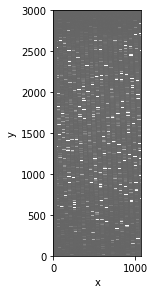

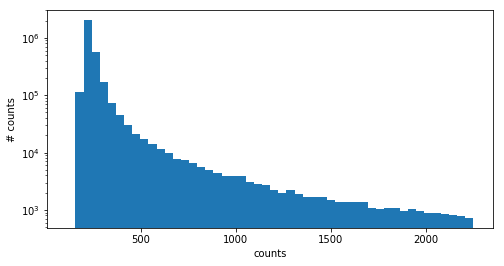


Processing image file :  /UVES.2011-03-31T11:19:00.655.npy
Mean:  318.0281669770329
Median:  216.0
StdDev:  1079.1617409793519


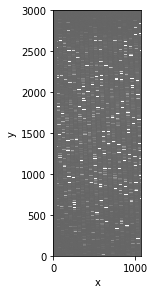

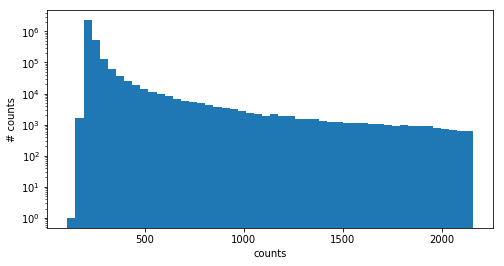


Processing image file :  /UVES.2011-12-21T09:34:02.118.npy
Mean:  352.03335195530724
Median:  223.0
StdDev:  1360.1540053740955


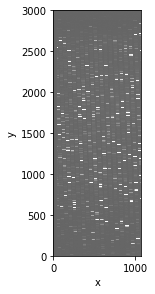

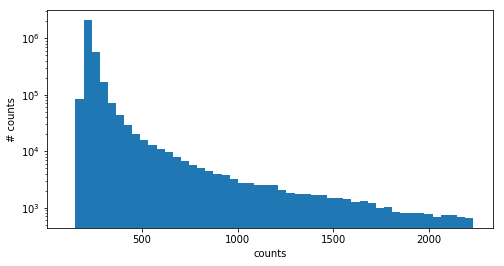


Processing image file :  /UVES.2015-05-05T11:51:35.817.npy
Mean:  356.0842141527002
Median:  222.0
StdDev:  1285.5146217530935


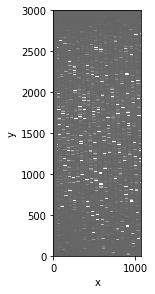

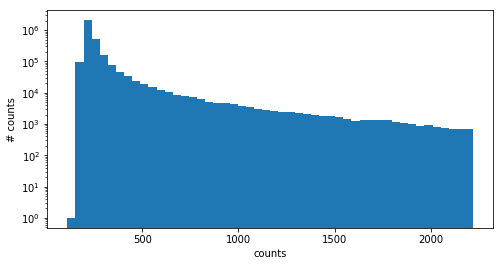


Processing image file :  /UVES.2010-07-03T12:12:18.907.npy
Mean:  321.3343022967101
Median:  215.0
StdDev:  1153.342060009348


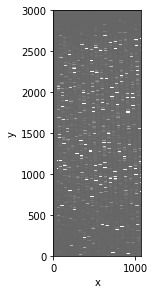

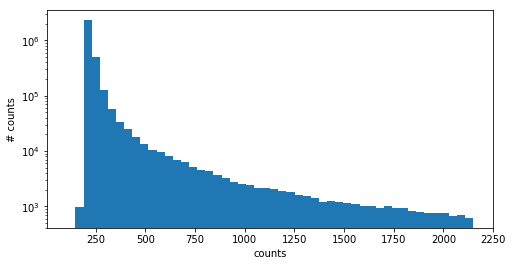

In [40]:
# Bias Blue 
#BlobSubDirs = 'bias_blue'#, 'bias_red', 'blue_arc_flat','red_arc_flat']
#blob_sub_dir = BlobSubDirs
#good_file = 'UVES.2010-05-09T10:48:24.977.fits' 
#bad_file = 'UVES.2010-10-26T09:32:08.896.fits'
#fits_files = [good_file, bad_file]
#arm = 0

# Bias Blue
cont_name_desc = 'processed'
blob_sub_dir = 'UVES_BLUE_WAVE'
extension = 'ext1'
nsample=5

npy_folder_rem = os.path.join('numpy', blob_sub_dir)
npy_folder_rem = os.path.join(npy_folder_rem, extension)

npy_files_list = []
BlobList(cont_name_desc, npy_folder_rem, npy_files_list)

if len(npy_files_list) >= nsample:
    npy_files_list = random.sample(npy_files_list, nsample)

#files_dict = {'good':['UVES.2016-09-14T10:02:58.217.fits', 'UVES.2017-05-07T08:58:17.533.fits','UVES.2019-03-02T09:48:36.576.fits'],
#              'bad_set2':['UVES.2015-12-09T08:48:05.206.fits', 'UVES.2018-05-09T11:18:08.186.fits', 'UVES.2015-12-07T08:55:07.048.fits'],
#              'bad':['UVES.2010-10-26T09:35:11.190.fits']}

#files_dict = {'good':['UVES.2016-09-14T10:02:58.217.fits', 'UVES.2017-05-07T08:58:17.533.fits','UVES.2019-03-02T09:48:36.576.fits'],
#              'bad_set1':['UVES.2010-10-26T09:32:08.896.fits', 'UVES.2010-10-26T09:32:54.480.fits', 'UVES.2010-10-26T09:33:40.043.fits'],
#              'bad_set2':['UVES.2015-12-09T08:48:05.206.fits', 'UVES.2018-05-09T11:18:08.186.fits', 'UVES.2015-12-07T08:55:07.048.fits']}

#print(files_dict)
arm = 0

# Blue Arc Flat
#BlobSubDirs = 'blue_arc_flat'#, 'bias_red', 'blue_arc_flat','red_arc_flat']
#blob_sub_dir = BlobSubDirs
#good_file = 'UVES.2010-02-27T17:48:25.456.fits' 
#bad_file = 'UVES.2015-12-05T20:55:25.270.fits'
#fits_files = [good_file, bad_file]
#arm = 1

# Red Arc Flat
#BlobSubDirs = 'red_arc_flat'#, 'bias_red', 'blue_arc_flat','red_arc_flat']
#blob_sub_dir = BlobSubDirs
#good_file = 'UVES.2010-07-30T23:36:46.453.fits' 
#bad_file = 'UVES.2014-01-11T18:47:56.548.fits'
#fits_files = [good_file, bad_file]
#arm = 1

path_loc = './Test'

#for file in fits_files:
for npy_file in npy_files_list:
    
    print("\nProcessing image file : ", npy_file)
    loc_file = path_loc  + npy_file
    rem_file = npy_folder_rem  + npy_file

    DownBlob(container_name_fits, rem_file, loc_file, True)

    while not os.path.exists(loc_file):
        time.sleep(0.1)

    imnamea = loc_file.replace('.npy', 'a.png')
    imnameb = loc_file.replace('.npy', 'b.png')
    DisplayImage(loc_file, imnamea, imnameb)
    #VisualImage(loc_file, arm, imnamea, imnameb)
    